<a href="https://colab.research.google.com/github/bellepoque7/2023-data-science-edu/blob/main/07-03%20%EB%94%A5%EB%9F%AC%EB%8B%9D(CNN)/3_6_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
from tensorflow.keras.datasets import cifar10

In [36]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [37]:
x_train.shape

(50000, 32, 32, 3)

In [38]:
x_train[0]
y_train[0]
y_train.shape

(50000, 1)

In [39]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [40]:
model = keras.models.Sequential()

In [41]:
#1. Convolution layer 만들기

model.add(keras.layers.Conv2D(filters= 32, kernel_size = (3,3), 
                              activation='relu',
                              padding = 'same',
                              input_shape=(32,32,3)))
# 필터의 갯수: 32
# 필터의 사이즈: 3,3
# 활성화 함수 = relu
# padding = same => 통과 하고 인풋 사이즈 알아서 동일하게

#2. Pooling layer 만들기 max pooling
# model.add(keras.layers.Flatten())
# model.add(keras.layers.MaxPooling2D((3,3), padding='same'))
#한번더 실행
# model.add(keras.layers.MaxPooling2D((3,3), padding='same'))


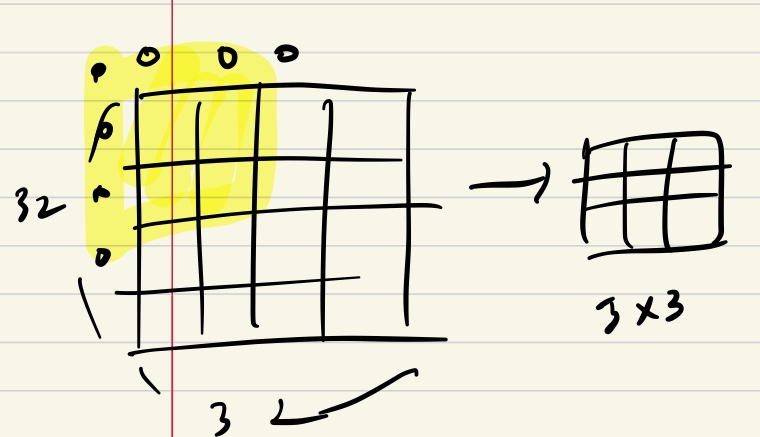

In [42]:
from IPython.display import Image
Image("maxpooling.jpeg", width = 300, height = 300)

In [43]:
# 3. FC 하기
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [44]:
# 모델 optimizer와 손실함수
#https://cheris8.github.io/artificial%20intelligence/DL-Keras-Loss-Function/
# y 값이 one-hot encoding 형태면 categorical_crossentropy
# y 값이 정수형이면 sparse_categorical_crossentropy
model.compile('adam', 'sparse_categorical_crossentropy', metrics ='accuracy')

In [45]:
model.summary()
# flattern (None, 32*32*32) 가 되어야 정상. 현재 문제 확인이 안됨

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                2097216   
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 2,098,762
Trainable params: 2,098,762
Non-trainable params: 0
_________________________________________________________________


In [46]:
# validation 하면서 트레이닝 하고싶으면 마지막 전달인자 validation data 삽입
# Epoch 가 높아지면 과적합 현상 볼수 있음.
model.fit(x_train, y_train, epochs = 5, validation_data= (x_test,y_test))
#5000개의 데이터를 32등분하여 1563.

Epoch 1/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4718 - accuracy: 0.4773 - val_loss: 1.3098 - val_accuracy: 0.5339
Epoch 2/5
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1814 - accuracy: 0.5879 - val_loss: 1.1993 - val_accuracy: 0.5785
Epoch 3/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.0451 - accuracy: 0.6357 - val_loss: 1.1340 - val_accuracy: 0.6040
Epoch 4/5
1563/1563 [==============================] - 85s 54ms/step - loss: 0.9368 - accuracy: 0.6728 - val_loss: 1.1245 - val_accuracy: 0.6157
Epoch 5/5
1563/1563 [==============================] - 82s 53ms/step - loss: 0.8366 - accuracy: 0.7074 - val_loss: 1.1318 - val_accuracy: 0.6088


Colab에서 런타임 -> 런타임 유형변경 ->  하드웨어 가속기 -> GPU로 설정하며 구굴이지원해주는 하드웨어 사용가능

In [47]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 1.1318 - accuracy: 0.6088


[1.1318097114562988, 0.6087999939918518]